# Index exploration 2

This notebook explores the indicies computed from sound files in a <a href="https://github.com/ljvillanueva/pumilio">pumilio</a> database.

#### Required packages

<a href="https://github.com/pydata/pandas">pandas</a> <br />
<a href="https://github.com/numpy/numpy">numpy</a> <br />
<a href="https://github.com/matplotlib/matplotlib">matplotlib</a> <br />
<a href="https://github.com/jacobdein/pymilio">pymilio</a>

#### Import statements

In [1]:
import pandas
from Pymilio import database
import numpy as np

In [2]:
import matplotlib.pylab as plt

In [3]:
%matplotlib inline

#### Connect to database

In [4]:
db = database.Pymilio_db_connection(user='pumilio',
                                    database='pumilio',
                                    read_default_file='~/.my.cnf.pumilio')

In [5]:
Sounds = db.fetch_as_pandas_df(table='Sounds', fields=['SoundID', 'SiteID', 'ColID']).set_index('SoundID')
Sites = db.fetch_as_pandas_df(table='Sites', fields=['SiteID', 'ID', 'SiteName']).set_index('SiteID')

## SSS (soundscapespec)

In [6]:
IndexSSS = db.fetch_as_pandas_df(table='IndexSSS', fields=['Sound', 'frequency_power']).set_index('Sound')

In [7]:
sss = IndexSSS.join(Sounds).join(Sites, on='SiteID').drop('SiteID', axis=1)

In [8]:
sss_collection1 = sss.groupby('ColID').get_group(1)

In [9]:
sss_collection1_byID = sss_collection1.groupby('ID')

In [10]:
biophony_mean_power = []
for group in sss_collection1_byID:
    site_power = group[1]['frequency_power']
    biophony_power = []
    for site in site_power.iteritems():
        site_biophony_power = np.array( [ float(n) for n in eval(site[1]) ][2:8] ).sum()
        biophony_power.append(site_biophony_power)
    biophony_power = np.array(biophony_power).mean()
    biophony_mean_power.append(biophony_power)

In [11]:
ordered_list = [23, 30, 22,  2, 17, 19, 11,  4,  9, 10, 25, 13, 24, 12, 14, 27,  1,
       28,  6, 18,  8, 15, 20,  7, 26, 16,  5,  3, 21, 29]

In [12]:
biophony_mean_power_list = pandas.DataFrame({'Site': ordered_list,
                                             'biophony': biophony_mean_power}).set_index('Site')

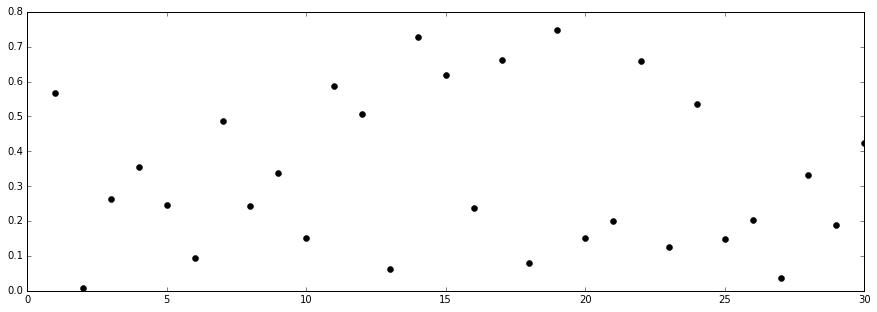

In [13]:
plt.figure(figsize=(15,5))
count = 1
for site in ordered_list:
    y = biophony_mean_power_list.loc[site]['biophony']
    plt.plot(count, y, 'ko')
    count = count + 1
#plt.xlim(0, 31)
#plt.ylim(0, 2.5)